## Income Prediction using Census Income dataset 

Given various features, the aim is to build a predictive model to determine the income level for people in US. The income levels are binned at below 50K and above 50K.

In [1]:
#Importing the required libraries

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
df=pd.read_csv("adult.csv") #Loading the dataset
df

,age,workclass,fnlwgt,education,educational-num,marital-status,occupation,relationship,race,gender,capital-gain,capital-loss,hours-per-week,native-country,income
0,25,Private,226802,11th,7,Never-married,Machine-op-inspct,Own-child,Black,Male,0,0,40,United-States,<=50K
1,38,Private,89814,HS-grad,9,Married-civ-spouse,Farming-fishing,Husband,White,Male,0,0,50,United-States,<=50K
2,28,Local-gov,336951,Assoc-acdm,12,Married-civ-spouse,Protective-serv,Husband,White,Male,0,0,40,United-States,>50K
3,44,Private,160323,Some-college,10,Married-civ-spouse,Machine-op-inspct,Husband,Black,Male,7688,0,40,United-States,>50K
4,18,?,103497,Some-college,10,Never-married,?,Own-child,White,Female,0,0,30,United-States,<=50K
5,34,Private,198693,10th,6,Never-married,Other-service,Not-in-family,White,Male,0,0,30,United-States,<=50K
6,29,?,227026,HS-grad,9,Never-married,?,Unmarried,Black,Male,0,0,40,United-States,<=50K
7,63,Self-emp-not-inc,104626,Prof-school,15,Married-civ-spouse,Prof-specialty,Husband,White,Male,3103,0,32,United-States,>50K
8,24,Private,369667,Some-college,10,Never-married,Other-service,Unmarried,White,Female,0,0,40,United-States,<=50K
9,55,Private,104996,7th-8th,4,Married-civ-spouse,Craft-repair,Husband,White,Male,0,0,10,United-States,<=50K


### Data Cleaning

In [3]:
a=df.replace("?",np.nan) #replacing the miscoded values
a

,age,workclass,fnlwgt,education,educational-num,marital-status,occupation,relationship,race,gender,capital-gain,capital-loss,hours-per-week,native-country,income
0,25,Private,226802,11th,7,Never-married,Machine-op-inspct,Own-child,Black,Male,0,0,40,United-States,<=50K
1,38,Private,89814,HS-grad,9,Married-civ-spouse,Farming-fishing,Husband,White,Male,0,0,50,United-States,<=50K
2,28,Local-gov,336951,Assoc-acdm,12,Married-civ-spouse,Protective-serv,Husband,White,Male,0,0,40,United-States,>50K
3,44,Private,160323,Some-college,10,Married-civ-spouse,Machine-op-inspct,Husband,Black,Male,7688,0,40,United-States,>50K
4,18,NaN,103497,Some-college,10,Never-married,NaN,Own-child,White,Female,0,0,30,United-States,<=50K
5,34,Private,198693,10th,6,Never-married,Other-service,Not-in-family,White,Male,0,0,30,United-States,<=50K
6,29,NaN,227026,HS-grad,9,Never-married,NaN,Unmarried,Black,Male,0,0,40,United-States,<=50K
7,63,Self-emp-not-inc,104626,Prof-school,15,Married-civ-spouse,Prof-specialty,Husband,White,Male,3103,0,32,United-States,>50K
8,24,Private,369667,Some-college,10,Never-married,Other-service,Unmarried,White,Female,0,0,40,United-States,<=50K
9,55,Private,104996,7th-8th,4,Married-civ-spouse,Craft-repair,Husband,White,Male,0,0,10,United-States,<=50K


In [4]:
a.isnull().sum() #checking the dataset for null values .... null values in three columns

age                   0
workclass          2799
fnlwgt                0
education             0
educational-num       0
marital-status        0
occupation         2809
relationship          0
race                  0
gender                0
capital-gain          0
capital-loss          0
hours-per-week        0
native-country      857
income                0
dtype: int64

In [5]:
a.mode() #finding mode to calculate the most occuring item in every column

,age,workclass,fnlwgt,education,educational-num,marital-status,occupation,relationship,race,gender,capital-gain,capital-loss,hours-per-week,native-country,income
0,36,Private,203488,HS-grad,9,Married-civ-spouse,Prof-specialty,Husband,White,Male,0,0,40,United-States,<=50K


In [6]:
a["workclass"]=a["workclass"].fillna("Private")
a["occupation"]=a["occupation"].fillna("Prof-specialty")
a["native-country"]=a["native-country"].fillna("United-States")
a  #.......filling the miscoded valued column with their mode

,age,workclass,fnlwgt,education,educational-num,marital-status,occupation,relationship,race,gender,capital-gain,capital-loss,hours-per-week,native-country,income
0,25,Private,226802,11th,7,Never-married,Machine-op-inspct,Own-child,Black,Male,0,0,40,United-States,<=50K
1,38,Private,89814,HS-grad,9,Married-civ-spouse,Farming-fishing,Husband,White,Male,0,0,50,United-States,<=50K
2,28,Local-gov,336951,Assoc-acdm,12,Married-civ-spouse,Protective-serv,Husband,White,Male,0,0,40,United-States,>50K
3,44,Private,160323,Some-college,10,Married-civ-spouse,Machine-op-inspct,Husband,Black,Male,7688,0,40,United-States,>50K
4,18,Private,103497,Some-college,10,Never-married,Prof-specialty,Own-child,White,Female,0,0,30,United-States,<=50K
5,34,Private,198693,10th,6,Never-married,Other-service,Not-in-family,White,Male,0,0,30,United-States,<=50K
6,29,Private,227026,HS-grad,9,Never-married,Prof-specialty,Unmarried,Black,Male,0,0,40,United-States,<=50K
7,63,Self-emp-not-inc,104626,Prof-school,15,Married-civ-spouse,Prof-specialty,Husband,White,Male,3103,0,32,United-States,>50K
8,24,Private,369667,Some-college,10,Never-married,Other-service,Unmarried,White,Female,0,0,40,United-States,<=50K
9,55,Private,104996,7th-8th,4,Married-civ-spouse,Craft-repair,Husband,White,Male,0,0,10,United-States,<=50K


In [7]:
a.isnull().sum() #null values removed
#DATA SET CLEANED

age                0
workclass          0
fnlwgt             0
education          0
educational-num    0
marital-status     0
occupation         0
relationship       0
race               0
gender             0
capital-gain       0
capital-loss       0
hours-per-week     0
native-country     0
income             0
dtype: int64

In [8]:
a.columns #columns names in dataset

Index([u'age', u'workclass', u'fnlwgt', u'education', u'educational-num',
       u'marital-status', u'occupation', u'relationship', u'race', u'gender',
       u'capital-gain', u'capital-loss', u'hours-per-week', u'native-country',
       u'income'],
      dtype='object')

In [9]:
a.dtypes #data type of every column

age                 int64
workclass          object
fnlwgt              int64
education          object
educational-num     int64
marital-status     object
occupation         object
relationship       object
race               object
gender             object
capital-gain        int64
capital-loss        int64
hours-per-week      int64
native-country     object
income             object
dtype: object

### Visualization 

In [10]:
#separating the categorical and numerical data

In [11]:
categorical = a.select_dtypes(include = ["object"]).keys()
print(categorical)

Index([u'workclass', u'education', u'marital-status', u'occupation',
       u'relationship', u'race', u'gender', u'native-country', u'income'],
      dtype='object')


In [12]:
quantitative = a.select_dtypes(include = ["int64"]).keys()
print(quantitative)

Index([u'age', u'fnlwgt', u'educational-num', u'capital-gain', u'capital-loss',
       u'hours-per-week'],
      dtype='object')


In [13]:
a[quantitative].describe() #performing statistics

,age,fnlwgt,educational-num,capital-gain,capital-loss,hours-per-week
count,48842.000000,4.884200e+04,48842.000000,48842.000000,48842.000000,48842.000000
mean,38.643585,1.896641e+05,10.078089,1079.067626,87.502314,40.422382
std,13.710510,1.056040e+05,2.570973,7452.019058,403.004552,12.391444
min,17.000000,1.228500e+04,1.000000,0.000000,0.000000,1.000000
25%,28.000000,1.175505e+05,9.000000,0.000000,0.000000,40.000000
50%,37.000000,1.781445e+05,10.000000,0.000000,0.000000,40.000000
75%,48.000000,2.376420e+05,12.000000,0.000000,0.000000,45.000000
max,90.000000,1.490400e+06,16.000000,99999.000000,4356.000000,99.000000


### plots of categorical data

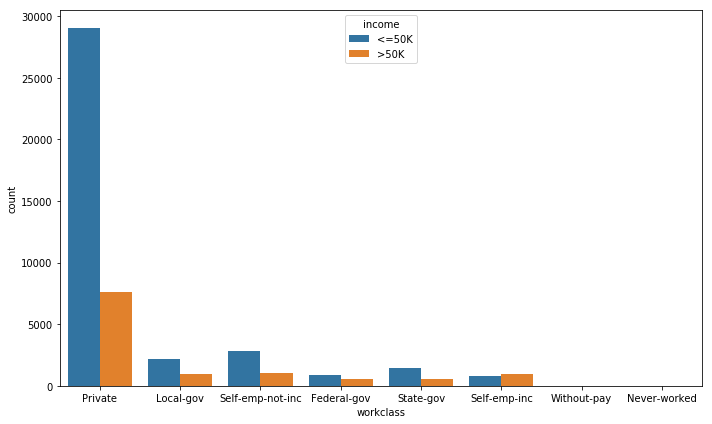

In [14]:
fig = plt.figure(figsize=(10,6))

sns.countplot('workclass', hue='income', data=a)
plt.tight_layout()
plt.show()

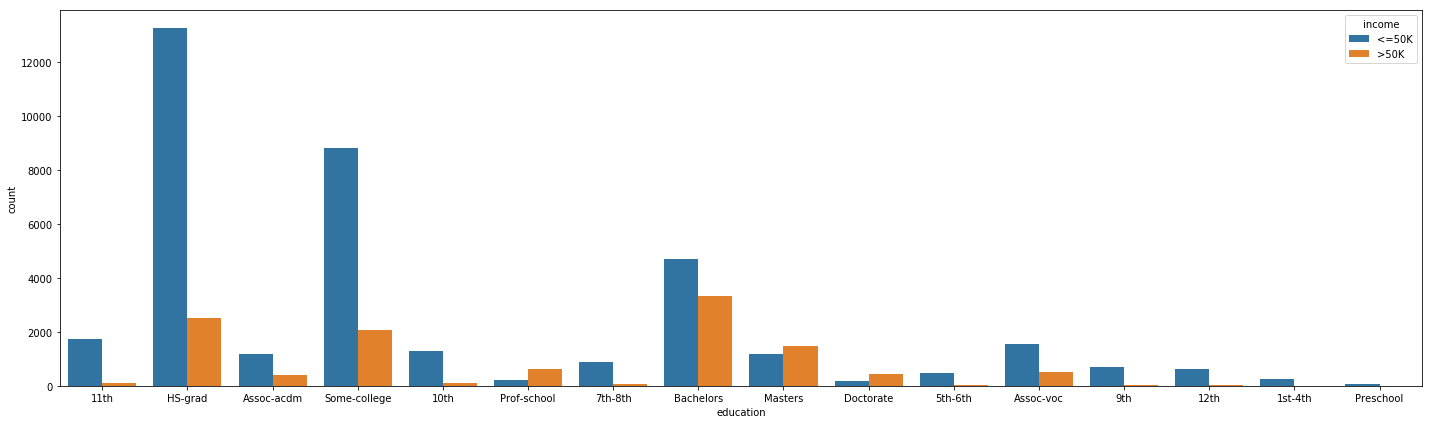

In [15]:
fig = plt.figure(figsize=(20,6))

sns.countplot('education', hue='income', data=a)
plt.tight_layout()
plt.show()


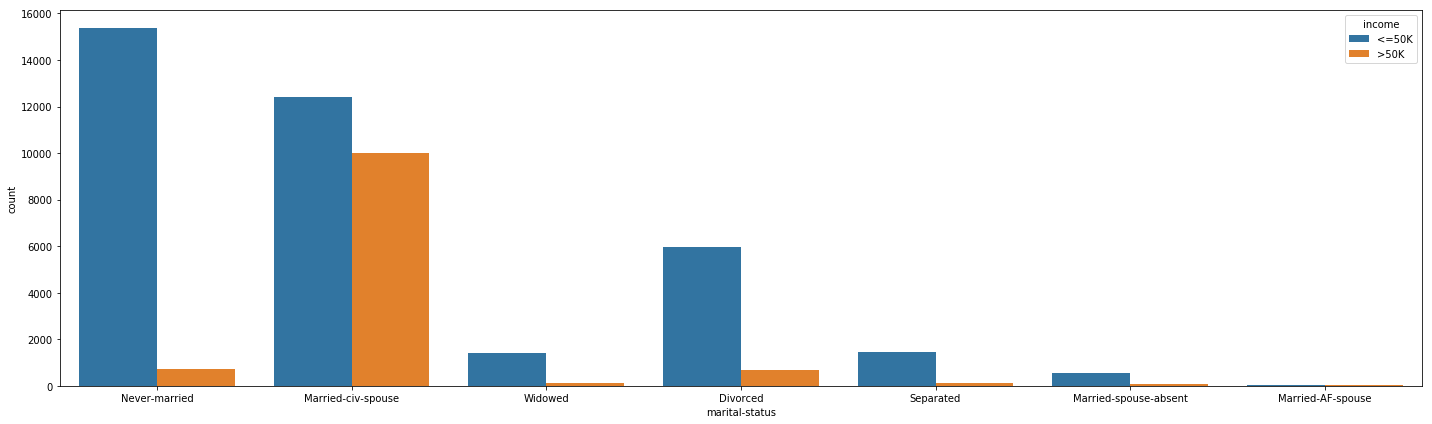

In [16]:
fig = plt.figure(figsize=(20,6))

sns.countplot('marital-status', hue='income', data=a)
plt.tight_layout()
plt.show()


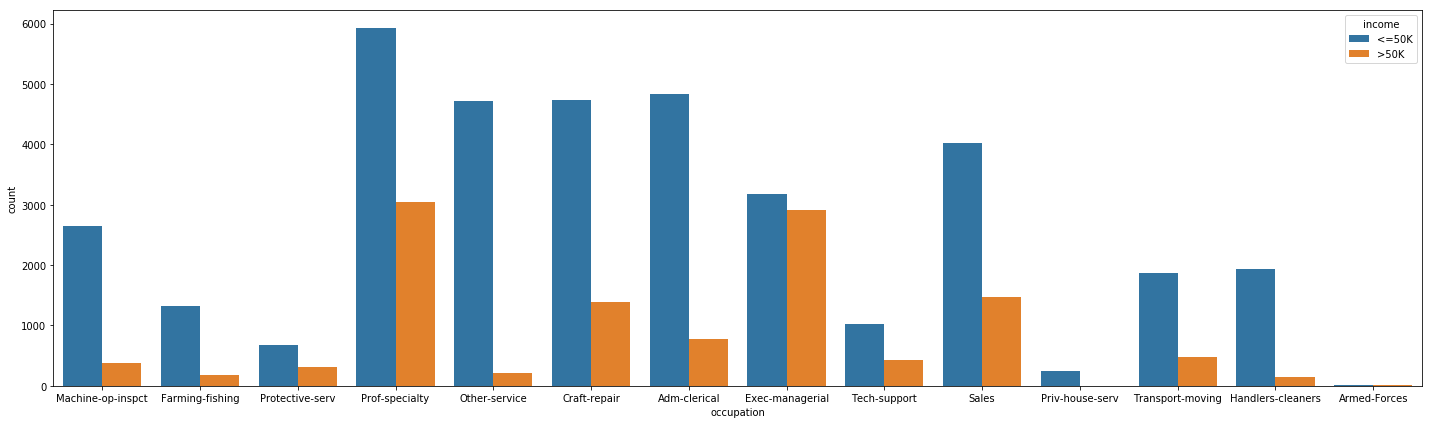

In [17]:
fig = plt.figure(figsize=(20,6))

sns.countplot('occupation', hue='income', data=a)
plt.tight_layout()
plt.show()


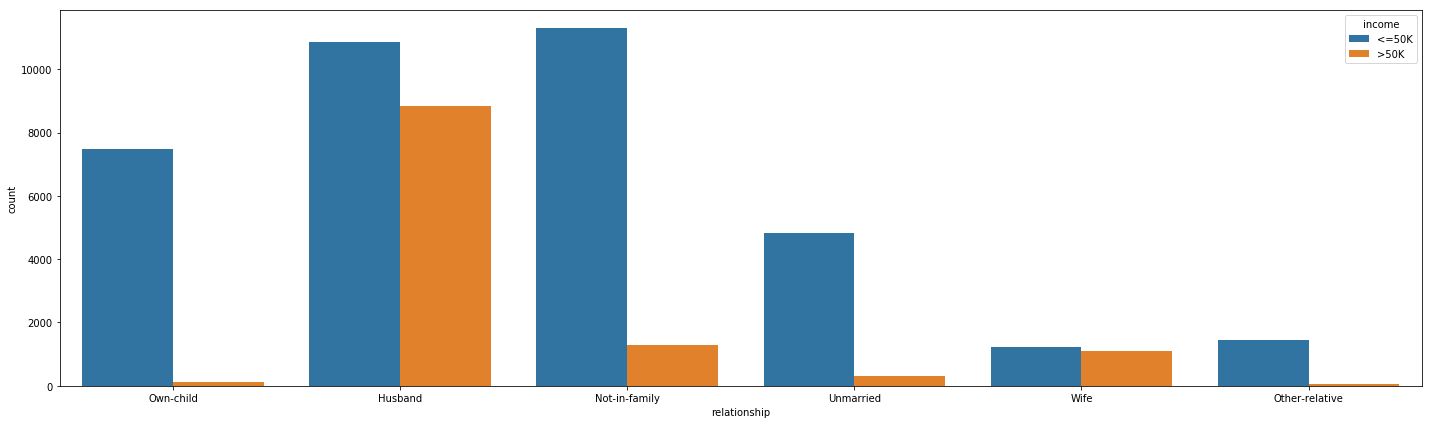

In [18]:
fig = plt.figure(figsize=(20,6))

sns.countplot('relationship', hue='income', data=a)
plt.tight_layout()
plt.show()


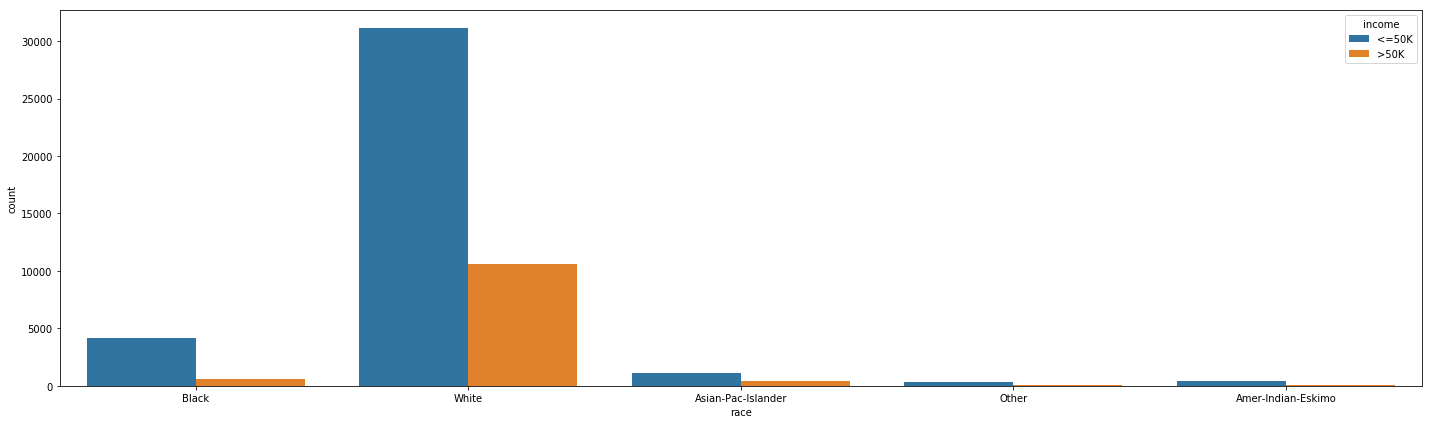

In [19]:
fig = plt.figure(figsize=(20,6))

sns.countplot('race', hue='income', data=a)
plt.tight_layout()
plt.show()


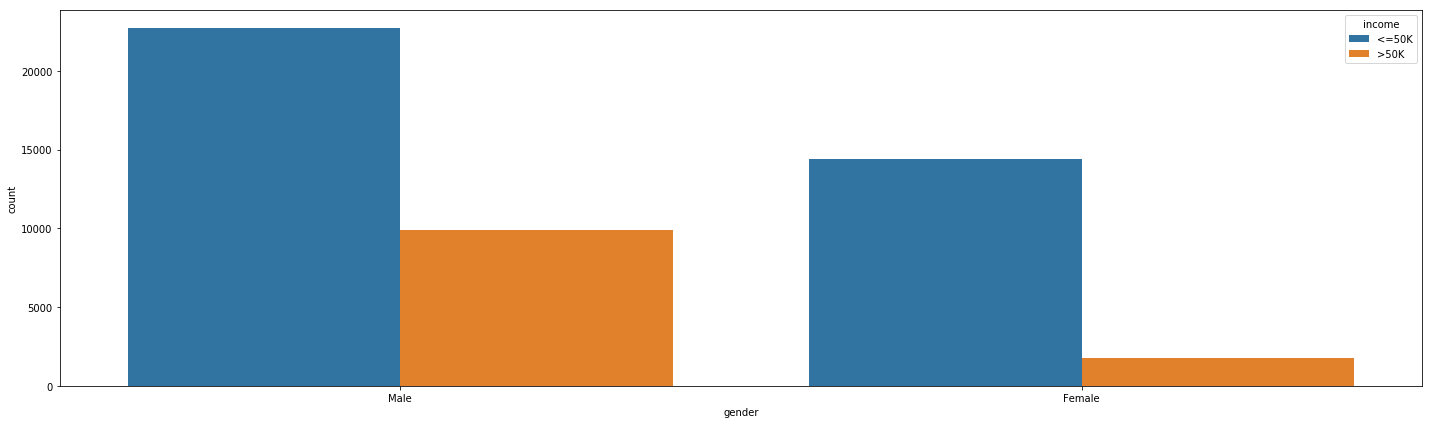

In [20]:
fig = plt.figure(figsize=(20,6))

sns.countplot('gender', hue='income', data=a)
plt.tight_layout()
plt.show()


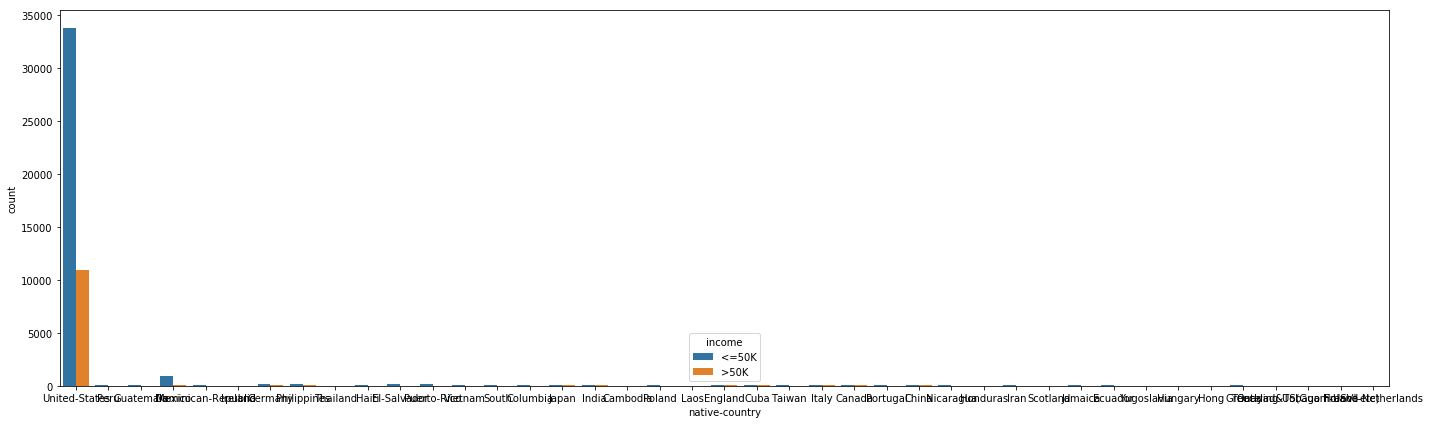

In [21]:
fig = plt.figure(figsize=(20,6))

sns.countplot('native-country', hue='income', data=a)
plt.tight_layout()
plt.show()


In [22]:
# converting gender and income to "0" and "1" 
def income_to_numeric(x):
    if x=='>50K':
        return 1
    if x=='<=50K':
        return 0
    
a['income'] = a['income'].apply(income_to_numeric)
def gender_to_numeric(x):
    if x=='Male':
        return 1
    if x=='Female':
        return 0
    
a['gender'] = a['gender'].apply(gender_to_numeric)


### EDA 

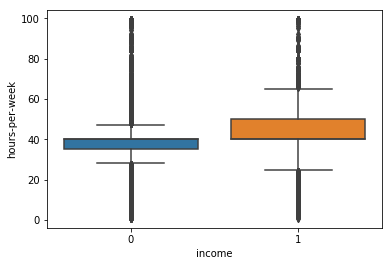

In [23]:

sns.boxplot(y='hours-per-week',x='income',data=a)

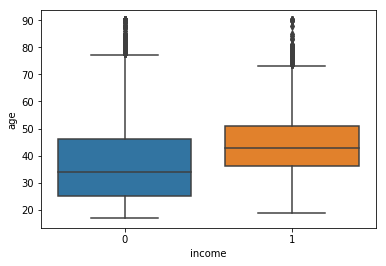

In [24]:
sns.boxplot(y='age',x='income',data=a)

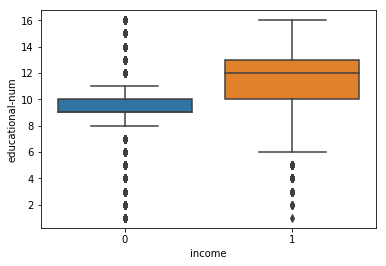

In [25]:
sns.boxplot(y='educational-num',x='income',data=a)

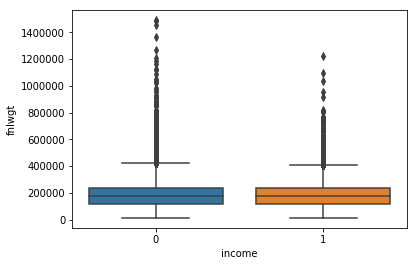

In [26]:
sns.boxplot(y='fnlwgt',x='income',data=a)

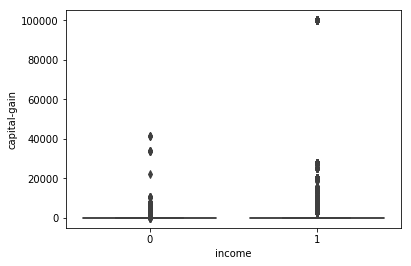

In [27]:
sns.boxplot(y='capital-gain',x='income',data=a)

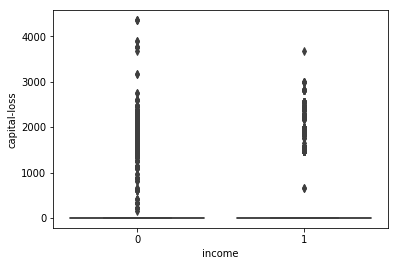

In [37]:
sns.boxplot(y='capital-loss',x='income',data=a)

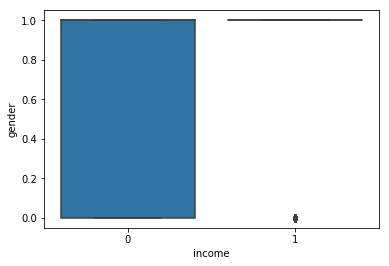

In [29]:
sns.boxplot(y=a['gender'],x='income',data=a)

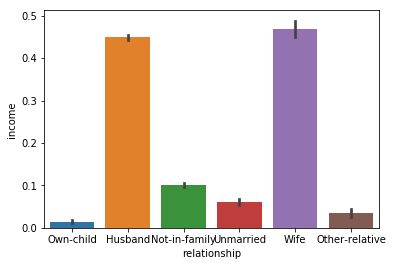

In [30]:
sns.barplot(y='income',x='relationship',data=a)

Text(0.5,0,u'native-country')

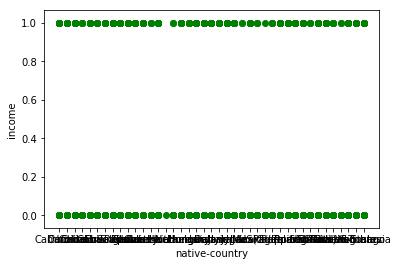

In [38]:
plt.scatter(a["native-country"],a["income"],c="g") 
plt.ylabel("income")
plt.xlabel("native-country")

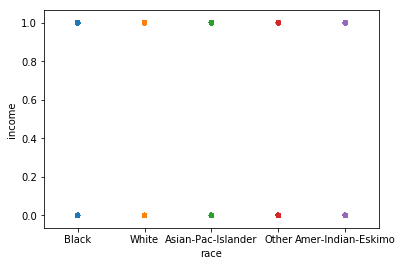

In [40]:
sns.stripplot(y="income",x="race",data=a)

In [31]:

dums=pd.get_dummies(a, columns=["workclass", "education", "marital-status", "occupation"])
dums

,age,fnlwgt,educational-num,relationship,race,gender,capital-gain,capital-loss,hours-per-week,native-country,...,occupation_Farming-fishing,occupation_Handlers-cleaners,occupation_Machine-op-inspct,occupation_Other-service,occupation_Priv-house-serv,occupation_Prof-specialty,occupation_Protective-serv,occupation_Sales,occupation_Tech-support,occupation_Transport-moving
0,25,226802,7,Own-child,Black,1,0,0,40,United-States,...,0,0,1,0,0,0,0,0,0,0
1,38,89814,9,Husband,White,1,0,0,50,United-States,...,1,0,0,0,0,0,0,0,0,0
2,28,336951,12,Husband,White,1,0,0,40,United-States,...,0,0,0,0,0,0,1,0,0,0
3,44,160323,10,Husband,Black,1,7688,0,40,United-States,...,0,0,1,0,0,0,0,0,0,0
4,18,103497,10,Own-child,White,0,0,0,30,United-States,...,0,0,0,0,0,1,0,0,0,0
5,34,198693,6,Not-in-family,White,1,0,0,30,United-States,...,0,0,0,1,0,0,0,0,0,0
6,29,227026,9,Unmarried,Black,1,0,0,40,United-States,...,0,0,0,0,0,1,0,0,0,0
7,63,104626,15,Husband,White,1,3103,0,32,United-States,...,0,0,0,0,0,1,0,0,0,0
8,24,369667,10,Unmarried,White,0,0,0,40,United-States,...,0,0,0,1,0,0,0,0,0,0
9,55,104996,4,Husband,White,1,0,0,10,United-States,...,0,0,0,0,0,0,0,0,0,0


In [32]:
dums=dums.drop(columns=["relationship","race","native-country"])

### After performing EDA we came to a conclusion that there are three columns which are not useful for the prediction and removal of these columns will not affect the prediction 

### We also converted required categorical values into numerical ones so that it will be easy to correlate between them

### Correlations between features

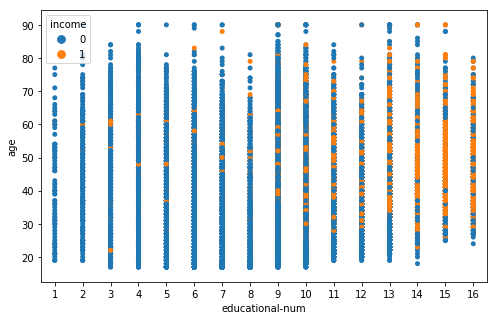

In [42]:
from pylab import rcParams
rcParams['figure.figsize'] = 8, 5
sns.stripplot(dums['educational-num'],dums['age'],hue=dums['income'],data=dums)

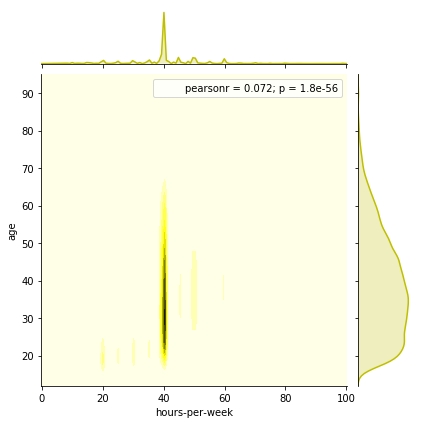

In [45]:
sns.jointplot(dums['hours-per-week'],dums['age'],kind='kde',color='y',data=dums)

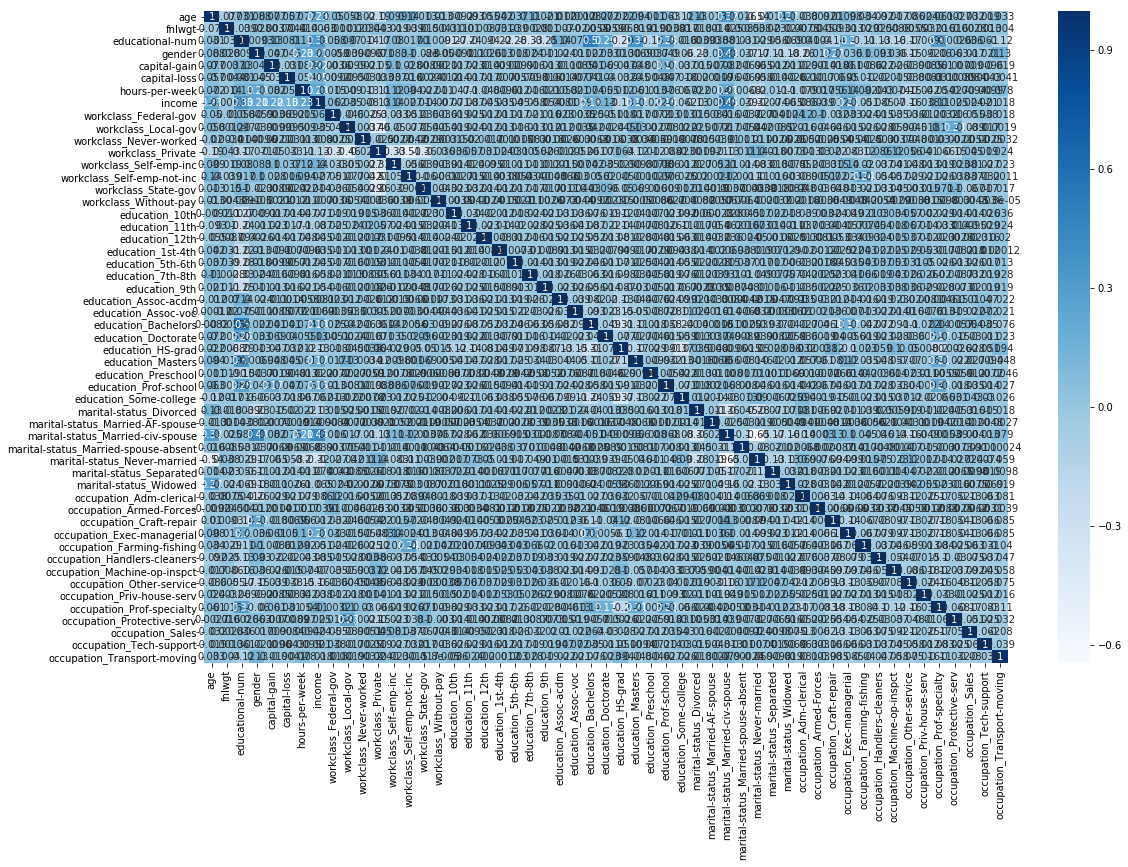

In [46]:
corr = dums.corr()
plt.figure(figsize=(18,12))
sns.heatmap(corr,cmap='Blues',annot=True)

### As with dummies we got extra columns so Feature engineering is done to extract those columns which are importand got the model

In [48]:
X = dums.drop(['income'],axis=1)    
Y = dums['income']


In [49]:
X = (X-X.min())/(X.max()-X.min())
X.head()

,age,fnlwgt,educational-num,gender,capital-gain,capital-loss,hours-per-week,workclass_Federal-gov,workclass_Local-gov,workclass_Never-worked,...,occupation_Farming-fishing,occupation_Handlers-cleaners,occupation_Machine-op-inspct,occupation_Other-service,occupation_Priv-house-serv,occupation_Prof-specialty,occupation_Protective-serv,occupation_Sales,occupation_Tech-support,occupation_Transport-moving
0,0.109589,0.145129,0.400000,1.0,0.000000,0.0,0.397959,0.0,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.287671,0.052451,0.533333,1.0,0.000000,0.0,0.500000,0.0,0.0,0.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.150685,0.219649,0.733333,1.0,0.000000,0.0,0.397959,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
3,0.369863,0.100153,0.600000,1.0,0.076881,0.0,0.397959,0.0,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.013699,0.061708,0.600000,0.0,0.000000,0.0,0.295918,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0


In [51]:
from sklearn.feature_selection import VarianceThreshold
selector = VarianceThreshold(0.005)
X = selector.fit_transform(X)
X.shape,Y.shape

((48842L, 46L), (48842L,))

### Applying various classifiers and comparing it
### PCA

In [52]:
from sklearn.preprocessing import StandardScaler

In [53]:
x_Std=StandardScaler().fit_transform(X)

In [68]:
from sklearn.decomposition import PCA
pca = PCA(n_components=10)

In [69]:
principalComponents = pca.fit_transform(x_Std)

In [70]:
principalDf = pd.DataFrame(data = principalComponents)

In [71]:
principalDf

,0,1,2,3,4,5,6,7,8,9
0,-2.637227,0.507277,-1.100820,0.958739,1.416464,0.528324,0.074969,1.118487,0.271864,0.891566
1,0.373947,2.390669,-0.194933,0.716813,-0.483486,0.335404,-1.509993,-0.762547,-0.935332,0.589952
2,2.161799,-0.399162,1.561339,3.130700,0.199922,-2.922736,0.904186,1.313349,-1.415131,-2.269574
3,0.052307,1.154739,-0.897239,-0.494277,0.124301,0.049245,2.124801,0.340027,0.562999,0.844267
4,-1.660593,-2.442187,-0.444650,0.740974,0.791761,0.400883,0.928097,-0.864514,0.720549,0.121532
5,-2.906795,0.413608,-0.038010,1.294185,1.482146,0.527083,0.103906,1.991746,-1.058385,-0.957771
6,-1.108874,-0.573951,-0.831733,0.351567,1.048710,-1.203480,-1.319005,-0.618206,0.358871,0.208177
7,4.390603,-0.298871,0.781933,1.220371,2.004882,0.718997,-0.538876,-3.575102,1.115673,1.349574
8,-2.519952,-1.700638,-0.217860,0.868078,0.003618,0.543216,0.949757,0.289931,0.231388,0.119655
9,-0.970676,3.695208,0.820243,-0.092716,2.464945,1.498232,1.435898,-2.294620,0.351072,-0.745831


In [72]:
from sklearn.model_selection import train_test_split
principalDf_train,principalDf_test,Y_train,Y_test = train_test_split(principalDf,Y,test_size = 0.2)

In [73]:
from sklearn.linear_model import LogisticRegression
model=LogisticRegression()
model.fit(principalDf_train,Y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

In [76]:
pred=model.predict(principalDf_test)
from sklearn import metrics
pca_acc=metrics.accuracy_score(Y_test,pred)*100
pca_acc

83.4271675708875

### Logistic Regression

In [80]:
from sklearn.linear_model import LogisticRegression
reg_lr = LogisticRegression(random_state=5)
reg_lr.fit(principalDf_train,Y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=5, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

In [81]:
pred_lr=reg_lr.predict(principalDf_test)
from sklearn import metrics
lr_acc=metrics.accuracy_score(Y_test,pred_lr)*100
lr_acc

83.4271675708875

### KNN

In [82]:
from sklearn.neighbors import KNeighborsClassifier
model_KNN = KNeighborsClassifier(n_neighbors=15)
model_KNN.fit(principalDf_train,Y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=1, n_neighbors=15, p=2,
           weights='uniform')

In [85]:
pred_KNN = model_KNN.predict(principalDf_test)
knn_acc = model_KNN.score(principalDf_test,Y_test)*100
knn_acc

83.30433002354386

### Naive bayes
#### GaussianNB

In [86]:
from sklearn.naive_bayes import GaussianNB
model_gnb=GaussianNB()
model_gnb.fit(principalDf_train,Y_train)

GaussianNB(priors=None)

In [87]:
pred_gnb = model_gnb.predict(principalDf_test)
gnb_acc = metrics.accuracy_score(Y_test,pred_gnb)*100
gnb_acc

81.69720544579792

#### BernoulliNB

In [89]:
from sklearn.naive_bayes import BernoulliNB
model_bnb=BernoulliNB()
model_bnb.fit(principalDf_train,Y_train)

BernoulliNB(alpha=1.0, binarize=0.0, class_prior=None, fit_prior=True)

In [91]:
pred_bnb = model_bnb.predict(principalDf_test)
bnb_acc = metrics.accuracy_score(Y_test,pred_bnb)*100
bnb_acc

78.39082812979834

### SVM

In [92]:
from sklearn.svm import SVC
model_svc=SVC()
model_svc.fit(principalDf_train,Y_train)

SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto', kernel='rbf',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False)

In [93]:
pred_svc = model_svc.predict(principalDf_test)
svc_acc = metrics.accuracy_score(Y_test,pred_svc)*100
svc_acc

84.00040945849115

### Decision Tree

In [94]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
model_tree= DecisionTreeClassifier() #max_leaf_nodes=12 #random_state=1
model_tree.fit(principalDf_train,Y_train)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best')

In [95]:
pred_tree = model_tree.predict(principalDf_test)
tree_acc=metrics.accuracy_score(Y_test,pred_tree)*100
tree_acc

77.75616746852288

#### Entropy

In [96]:
model_tree1 = DecisionTreeClassifier(criterion="entropy") #max_leaf_nodes=12 #random_state=1
model_tree1.fit(principalDf_train,Y_train)


DecisionTreeClassifier(class_weight=None, criterion='entropy', max_depth=None,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best')

In [97]:
pred_tree1 = model_tree1.predict(principalDf_test)
tree1_acc= metrics.accuracy_score(Y_test,pred_tree1)*100
tree1_acc

78.67744907360016

### RandomForest

In [99]:
b = RandomForestClassifier(max_leaf_nodes=14)
b.fit(principalDf_train,Y_train)
b_pred = b.predict(principalDf_test)
bacc=metrics.accuracy_score(Y_test,b_pred)*100
bacc

83.20196540075749

#### Entropy

In [101]:
b1 = RandomForestClassifier(criterion="entropy",max_leaf_nodes=14)
b1.fit(principalDf_train,Y_train)
b1_pred = b1.predict(principalDf_test)
b1acc=metrics.accuracy_score(Y_test,b1_pred)*100
b1acc

82.85392568328386

### Ensemble methods
#### BaggingClassifier

In [111]:
from sklearn.ensemble import BaggingClassifier
bagging = BaggingClassifier(max_samples=0.5,max_features=0.5)
bagging.fit(principalDf_train,Y_train)
pred_E_BC = bagging.predict(principalDf_test)
bc=metrics.accuracy_score(Y_test,pred_E_BC)*100
bc

82.31139318251613

#### GradientBoostingClassifier

In [108]:
from sklearn.ensemble import GradientBoostingClassifier
from sklearn import metrics
model_E_GBC = GradientBoostingClassifier(n_estimators=200,learning_rate=.02)
model_E_GBC.fit(principalDf_train,Y_train)
pred_E_GBC = model_E_GBC.predict(principalDf_test)
gbcacc = metrics.accuracy_score(Y_test,pred_E_GBC)*100
gbcacc

83.77520728836114

#### VotingClassifier

In [110]:
from sklearn.ensemble import VotingClassifier
model1 = DecisionTreeClassifier()
model2 = LogisticRegression()
model3 = SVC()
model_E_VC = VotingClassifier(estimators=[('DT',model1),('LR',model2),('SVC',model3)])
model_E_VC.fit(principalDf_train,Y_train)
pred_E_VC = model_E_VC.predict(principalDf_test)
vc=metrics.accuracy_score(Y_test,pred_E_VC)*100
vc

C:\Users\Dell\Anaconda2\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


83.99017299621251

In [112]:
accuracyScore = [pca_acc,lr_acc,knn_acc,gnb_acc,bnb_acc,svc_acc,tree_acc,tree1_acc,bacc,b1acc,bc,gbcacc,vc]
algoName = ['PCA', 'LR', 'KNN' , 'GNB', 'BNB' , 'SVM' , 'DT' , 'EDT', 'RF' , 'ERF','BC','GBC','VC']

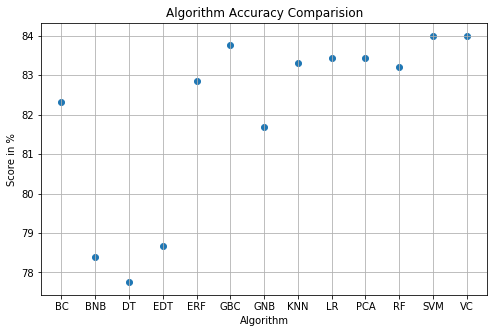

In [113]:
plt.scatter(algoName, accuracyScore)
plt.grid()
plt.title('Algorithm Accuracy Comparision')
plt.xlabel('Algorithm')
plt.ylabel('Score in %')
plt.show()

### Conclusion: so, we get a maximum of 84 % accuracy via SVM Model